<a href="https://colab.research.google.com/github/youngpaper1115/ML-DL-Example/blob/main/MLDL_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the wine data set

In [2]:
import pandas as pd

df_wine = pd.read_csv('/content/drive/MyDrive/Python_SNU/data/wine.data.txt', header=None) #각자 알맞은 wine.data 파일 경로 입력

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

2. Split the data into 70% training and 30% test subsets

In [8]:
from sklearn.model_selection import train_test_split

# y: class label
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0) #7:3으로 분할

3. Standardize the data

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

4. Calculate the covariance matrix and eigenvalues

In [10]:
import numpy as np
cov_mat = np.cov(X_train_std.T) #공분산 행렬 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print(eigen_vecs.shape)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
(13, 13)


5. Calculate and plot the explained variance

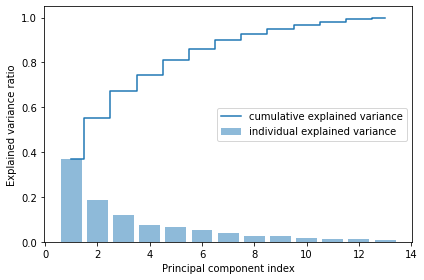

In [11]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] #크기 순으로 정렬 
cum_var_exp = np.cumsum(var_exp) #누적 합산

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

6. Feature transformation

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print(eigen_pairs[0])
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

(4.8427453156558915, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651]))
Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


6-1 plot the new matrix X'

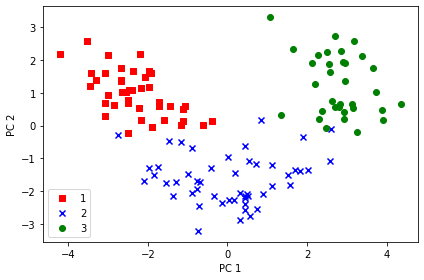

In [13]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Principal component analysis in scikit-learn

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca = pca.fit_transform(X_train_std)
 #정규화된 데이터를 사용
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

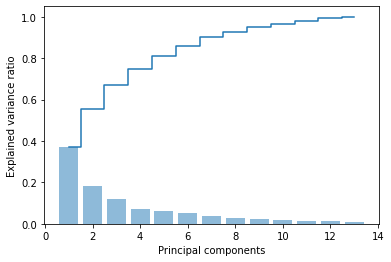

In [15]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

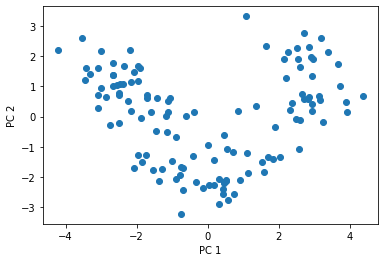

In [17]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Regression

In [18]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

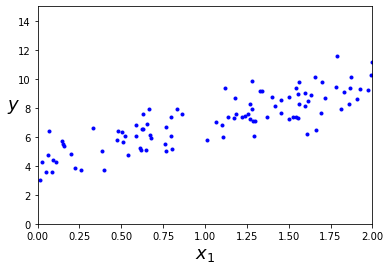

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [21]:
lin_reg.intercept_, lin_reg.coef_

(array([4.33383923]), array([[2.66005874]]))

In [22]:
X_new = np.array([[0], [2]])

In [23]:
X_new

array([[0],
       [2]])

In [24]:
y_predict = lin_reg.predict(X_new)

In [25]:
y_predict

array([[4.33383923],
       [9.65395671]])

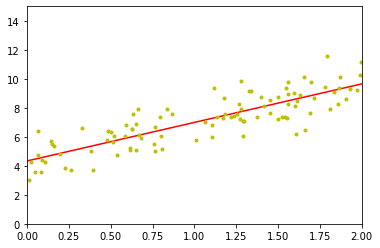

In [26]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()

In [27]:
from sklearn.metrics import r2_score 
r2_score(y,lin_reg.predict(X))

0.7088620036649966

Lasso

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [29]:
y_predict_lasso = lasso_reg.predict(X_new)

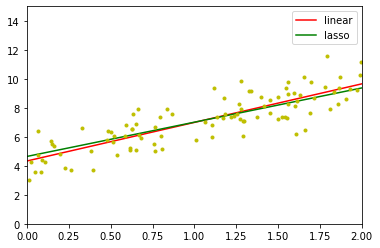

In [30]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [31]:
r2_score(y,lasso_reg.predict(X))

0.6999742362527881

Ridge

In [32]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

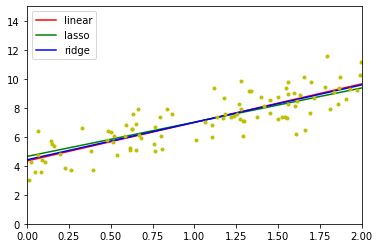

In [33]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Multiple Linear Regression

In [36]:
housing = pd.read_csv('/content/drive/MyDrive/Python_SNU/data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
housing = housing[['median_income', 'total_rooms', 'median_house_value']]

In [38]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [39]:
X_train, y_train = train_set[['median_income', 'total_rooms']], train_set['median_house_value']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [42]:
lin_reg.predict(X_test)

array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [43]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

84210.3094307468

In [44]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

62987.5275786113